In [33]:
# load up modules
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [34]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
!pip install keras

In [16]:
!pip install keras-tuner

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12128680787949525887
xla_global_id: -1
]


In [20]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [25]:
filenames=os.listdir(r"C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs_v_Cats\train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [27]:

df.shape

df.head()

(25000, 2)

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


<div style="background-color:lightblue;">
Prepare data for modeling
</div>

In [32]:
%pwd

'C:\\Users\\Stephen\\OneDrive\\Northwestern\\422 ML'

In [40]:
os.chdir(r'C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs_v_Cats')

In [56]:
%pwd

'C:\\Users\\Stephen\\OneDrive\\Northwestern\\422 ML\\Dogs_v_Cats'

In [51]:

if os.path.isdir('train\dog') is False:
    os.makedirs('train\dog')
    os.makedirs('train\cat')
    os.makedirs('valid\dog')
    os.makedirs('valid\cat')
    os.makedirs('test\dog')
    os.makedirs('test\cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train\cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train\dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid\cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid\dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test\cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test\dog')


'train\\cat\\cat.6194.jpg'

'train\\cat\\cat.1827.jpg'

'train\\cat\\cat.4919.jpg'

'train\\cat\\cat.12143.jpg'

'train\\cat\\cat.12038.jpg'

'train\\cat\\cat.5208.jpg'

'train\\cat\\cat.6422.jpg'

'train\\cat\\cat.3940.jpg'

'train\\cat\\cat.5114.jpg'

'train\\cat\\cat.9743.jpg'

'train\\cat\\cat.9638.jpg'

'train\\cat\\cat.7510.jpg'

'train\\cat\\cat.3236.jpg'

'train\\cat\\cat.4599.jpg'

'train\\cat\\cat.7477.jpg'

'train\\cat\\cat.3747.jpg'

'train\\cat\\cat.2098.jpg'

'train\\cat\\cat.5226.jpg'

'train\\cat\\cat.4828.jpg'

'train\\cat\\cat.215.jpg'

'train\\cat\\cat.6078.jpg'

'train\\cat\\cat.3544.jpg'

'train\\cat\\cat.8800.jpg'

'train\\cat\\cat.11412.jpg'

'train\\cat\\cat.2728.jpg'

'train\\cat\\cat.6504.jpg'

'train\\cat\\cat.4780.jpg'

'train\\cat\\cat.2289.jpg'

'train\\cat\\cat.9980.jpg'

'train\\cat\\cat.9859.jpg'

'train\\cat\\cat.6774.jpg'

'train\\cat\\cat.2150.jpg'

'train\\cat\\cat.2884.jpg'

'train\\cat\\cat.5414.jpg'

'train\\cat\\cat.12379.jpg'

'train\\cat\\cat.10087.jpg'

'train\\cat\\cat.9111.jpg'

'train\\cat\\cat.9030.jpg'

'train\\cat\\cat.6890.jpg'

'train\\cat\\cat.10277.jpg'

'train\\cat\\cat.1764.jpg'

'train\\cat\\cat.10911.jpg'

'train\\cat\\cat.8567.jpg'

'train\\cat\\cat.2425.jpg'

'train\\cat\\cat.6150.jpg'

'train\\cat\\cat.242.jpg'

'train\\cat\\cat.9824.jpg'

'train\\cat\\cat.7282.jpg'

'train\\cat\\cat.10987.jpg'

'train\\cat\\cat.6376.jpg'

'train\\cat\\cat.7899.jpg'

'train\\cat\\cat.5515.jpg'

'train\\cat\\cat.1345.jpg'

'train\\cat\\cat.9033.jpg'

'train\\cat\\cat.10096.jpg'

'train\\cat\\cat.3215.jpg'

'train\\cat\\cat.11818.jpg'

'train\\cat\\cat.11764.jpg'

'train\\cat\\cat.12165.jpg'

'train\\cat\\cat.8138.jpg'

'train\\cat\\cat.1043.jpg'

'train\\cat\\cat.6398.jpg'

'train\\cat\\cat.8619.jpg'

'train\\cat\\cat.6777.jpg'

'train\\cat\\cat.4732.jpg'

'train\\cat\\cat.6123.jpg'

'train\\cat\\cat.9117.jpg'

'train\\cat\\cat.9826.jpg'

'train\\cat\\cat.2258.jpg'

'train\\cat\\cat.7232.jpg'

'train\\cat\\cat.10078.jpg'

'train\\cat\\cat.5478.jpg'

'train\\cat\\cat.10863.jpg'

'train\\cat\\cat.1123.jpg'

'train\\cat\\cat.1282.jpg'

'train\\cat\\cat.2980.jpg'

'train\\cat\\cat.2873.jpg'

'train\\cat\\cat.8410.jpg'

'train\\cat\\cat.4248.jpg'

'train\\cat\\cat.4236.jpg'

'train\\cat\\cat.2480.jpg'

'train\\cat\\cat.5663.jpg'

'train\\cat\\cat.11264.jpg'

'train\\cat\\cat.192.jpg'

'train\\cat\\cat.7466.jpg'

'train\\cat\\cat.1130.jpg'

'train\\cat\\cat.10422.jpg'

'train\\cat\\cat.8620.jpg'

'train\\cat\\cat.3817.jpg'

'train\\cat\\cat.4664.jpg'

'train\\cat\\cat.3888.jpg'

'train\\cat\\cat.9807.jpg'

'train\\cat\\cat.6726.jpg'

'train\\cat\\cat.6266.jpg'

'train\\cat\\cat.2063.jpg'

'train\\cat\\cat.5162.jpg'

'train\\cat\\cat.5177.jpg'

'train\\cat\\cat.3064.jpg'

'train\\cat\\cat.4332.jpg'

'train\\cat\\cat.8175.jpg'

'train\\cat\\cat.8968.jpg'

'train\\cat\\cat.11942.jpg'

'train\\cat\\cat.3209.jpg'

'train\\cat\\cat.4258.jpg'

'train\\cat\\cat.884.jpg'

'train\\cat\\cat.5276.jpg'

'train\\cat\\cat.3439.jpg'

'train\\cat\\cat.1418.jpg'

'train\\cat\\cat.8427.jpg'

'train\\cat\\cat.3574.jpg'

'train\\cat\\cat.6107.jpg'

'train\\cat\\cat.10966.jpg'

'train\\cat\\cat.9820.jpg'

'train\\cat\\cat.866.jpg'

'train\\cat\\cat.12164.jpg'

'train\\cat\\cat.4693.jpg'

'train\\cat\\cat.3337.jpg'

'train\\cat\\cat.5029.jpg'

'train\\cat\\cat.12396.jpg'

'train\\cat\\cat.9295.jpg'

'train\\cat\\cat.7548.jpg'

'train\\cat\\cat.6978.jpg'

'train\\cat\\cat.1441.jpg'

'train\\cat\\cat.8471.jpg'

'train\\cat\\cat.6851.jpg'

'train\\cat\\cat.154.jpg'

'train\\cat\\cat.4439.jpg'

'train\\cat\\cat.2379.jpg'

'train\\cat\\cat.12290.jpg'

'train\\cat\\cat.5555.jpg'

'train\\cat\\cat.9727.jpg'

'train\\cat\\cat.2767.jpg'

'train\\cat\\cat.7174.jpg'

'train\\cat\\cat.4590.jpg'

'train\\cat\\cat.4604.jpg'

'train\\cat\\cat.6064.jpg'

'train\\cat\\cat.7264.jpg'

'train\\cat\\cat.11359.jpg'

'train\\cat\\cat.9164.jpg'

'train\\cat\\cat.4265.jpg'

'train\\cat\\cat.3220.jpg'

'train\\cat\\cat.10995.jpg'

'train\\cat\\cat.1843.jpg'

'train\\cat\\cat.10937.jpg'

'train\\cat\\cat.2565.jpg'

'train\\cat\\cat.12373.jpg'

'train\\cat\\cat.9785.jpg'

'train\\cat\\cat.83.jpg'

'train\\cat\\cat.5524.jpg'

'train\\cat\\cat.526.jpg'

'train\\cat\\cat.11554.jpg'

'train\\cat\\cat.448.jpg'

'train\\cat\\cat.8552.jpg'

'train\\cat\\cat.6815.jpg'

'train\\cat\\cat.995.jpg'

'train\\cat\\cat.11800.jpg'

'train\\cat\\cat.1471.jpg'

'train\\cat\\cat.8408.jpg'

'train\\cat\\cat.2057.jpg'

'train\\cat\\cat.8966.jpg'

'train\\cat\\cat.6057.jpg'

'train\\cat\\cat.115.jpg'

'train\\cat\\cat.3367.jpg'

'train\\cat\\cat.10333.jpg'

'train\\cat\\cat.3333.jpg'

'train\\cat\\cat.10092.jpg'

'train\\cat\\cat.2103.jpg'

'train\\cat\\cat.6989.jpg'

'train\\cat\\cat.2333.jpg'

'train\\cat\\cat.8475.jpg'

'train\\cat\\cat.397.jpg'

'train\\cat\\cat.10135.jpg'

'train\\cat\\cat.3543.jpg'

'train\\cat\\cat.5665.jpg'

'train\\cat\\cat.10827.jpg'

'train\\cat\\cat.2519.jpg'

'train\\cat\\cat.8132.jpg'

'train\\cat\\cat.547.jpg'

'train\\cat\\cat.4197.jpg'

'train\\cat\\cat.11383.jpg'

'train\\cat\\cat.10617.jpg'

'train\\cat\\cat.3880.jpg'

'train\\cat\\cat.7397.jpg'

'train\\cat\\cat.1347.jpg'

'train\\cat\\cat.5533.jpg'

'train\\cat\\cat.9211.jpg'

'train\\cat\\cat.1921.jpg'

'train\\cat\\cat.12103.jpg'

'train\\cat\\cat.1985.jpg'

'train\\cat\\cat.10142.jpg'

'train\\cat\\cat.8398.jpg'

'train\\cat\\cat.8573.jpg'

'train\\cat\\cat.8930.jpg'

'train\\cat\\cat.9662.jpg'

'train\\cat\\cat.533.jpg'

'train\\cat\\cat.2727.jpg'

'train\\cat\\cat.7990.jpg'

'train\\cat\\cat.9969.jpg'

'train\\cat\\cat.6391.jpg'

'train\\cat\\cat.4324.jpg'

'train\\cat\\cat.1297.jpg'

'train\\cat\\cat.1687.jpg'

'train\\cat\\cat.1479.jpg'

'train\\cat\\cat.9453.jpg'

'train\\cat\\cat.4001.jpg'

'train\\cat\\cat.2716.jpg'

'train\\cat\\cat.2734.jpg'

'train\\cat\\cat.8522.jpg'

'train\\cat\\cat.6462.jpg'

'train\\cat\\cat.11120.jpg'

'train\\cat\\cat.7485.jpg'

'train\\cat\\cat.8348.jpg'

'train\\cat\\cat.3224.jpg'

'train\\cat\\cat.11801.jpg'

'train\\cat\\cat.11938.jpg'

'train\\cat\\cat.3720.jpg'

'train\\cat\\cat.10329.jpg'

'train\\cat\\cat.2628.jpg'

'train\\cat\\cat.10776.jpg'

'train\\cat\\cat.12188.jpg'

'train\\cat\\cat.11509.jpg'

'train\\cat\\cat.249.jpg'

'train\\cat\\cat.1137.jpg'

'train\\cat\\cat.4752.jpg'

'train\\cat\\cat.1412.jpg'

'train\\cat\\cat.7704.jpg'

'train\\cat\\cat.10785.jpg'

'train\\cat\\cat.9234.jpg'

'train\\cat\\cat.10200.jpg'

'train\\cat\\cat.4577.jpg'

'train\\cat\\cat.4106.jpg'

'train\\cat\\cat.11611.jpg'

'train\\cat\\cat.9620.jpg'

'train\\cat\\cat.7342.jpg'

'train\\cat\\cat.11034.jpg'

'train\\cat\\cat.9949.jpg'

'train\\cat\\cat.7200.jpg'

'train\\cat\\cat.9656.jpg'

'train\\cat\\cat.5298.jpg'

'train\\cat\\cat.7050.jpg'

'train\\cat\\cat.70.jpg'

'train\\cat\\cat.525.jpg'

'train\\cat\\cat.8145.jpg'

'train\\cat\\cat.47.jpg'

'train\\cat\\cat.5398.jpg'

'train\\cat\\cat.6567.jpg'

'train\\cat\\cat.7571.jpg'

'train\\cat\\cat.4131.jpg'

'train\\cat\\cat.11188.jpg'

'train\\cat\\cat.2682.jpg'

'train\\cat\\cat.8670.jpg'

'train\\cat\\cat.5642.jpg'

'train\\cat\\cat.8059.jpg'

'train\\cat\\cat.4329.jpg'

'train\\cat\\cat.6977.jpg'

'train\\cat\\cat.5807.jpg'

'train\\cat\\cat.5805.jpg'

'train\\cat\\cat.5784.jpg'

'train\\cat\\cat.9337.jpg'

'train\\cat\\cat.11577.jpg'

'train\\cat\\cat.3504.jpg'

'train\\cat\\cat.10765.jpg'

'train\\cat\\cat.7164.jpg'

'train\\cat\\cat.7080.jpg'

'train\\cat\\cat.2064.jpg'

'train\\cat\\cat.7909.jpg'

'train\\cat\\cat.11621.jpg'

'train\\cat\\cat.1594.jpg'

'train\\cat\\cat.5542.jpg'

'train\\cat\\cat.1278.jpg'

'train\\cat\\cat.3429.jpg'

'train\\cat\\cat.11350.jpg'

'train\\cat\\cat.9505.jpg'

'train\\cat\\cat.10626.jpg'

'train\\cat\\cat.7437.jpg'

'train\\cat\\cat.12355.jpg'

'train\\cat\\cat.6828.jpg'

'train\\cat\\cat.4625.jpg'

'train\\cat\\cat.2960.jpg'

'train\\cat\\cat.11592.jpg'

'train\\cat\\cat.5408.jpg'

'train\\cat\\cat.9071.jpg'

'train\\cat\\cat.6147.jpg'

'train\\cat\\cat.7001.jpg'

'train\\cat\\cat.3494.jpg'

'train\\cat\\cat.10599.jpg'

'train\\cat\\cat.5795.jpg'

'train\\cat\\cat.7566.jpg'

'train\\cat\\cat.4368.jpg'

'train\\cat\\cat.6860.jpg'

'train\\cat\\cat.6613.jpg'

'train\\cat\\cat.2897.jpg'

'train\\cat\\cat.8425.jpg'

'train\\cat\\cat.4789.jpg'

'train\\cat\\cat.10463.jpg'

'train\\cat\\cat.2424.jpg'

'train\\cat\\cat.789.jpg'

'train\\cat\\cat.11446.jpg'

'train\\cat\\cat.8944.jpg'

'train\\cat\\cat.8262.jpg'

'train\\cat\\cat.4427.jpg'

'train\\cat\\cat.9005.jpg'

'train\\cat\\cat.5337.jpg'

'train\\cat\\cat.1700.jpg'

'train\\cat\\cat.12313.jpg'

'train\\cat\\cat.11836.jpg'

'train\\cat\\cat.1747.jpg'

'train\\cat\\cat.7732.jpg'

'train\\cat\\cat.10134.jpg'

'train\\cat\\cat.11015.jpg'

'train\\cat\\cat.1983.jpg'

'train\\cat\\cat.5062.jpg'

'train\\cat\\cat.1009.jpg'

'train\\cat\\cat.3273.jpg'

'train\\cat\\cat.4864.jpg'

'train\\cat\\cat.3645.jpg'

'train\\cat\\cat.2555.jpg'

'train\\cat\\cat.1099.jpg'

'train\\cat\\cat.7725.jpg'

'train\\cat\\cat.1519.jpg'

'train\\cat\\cat.4180.jpg'

'train\\cat\\cat.10378.jpg'

'train\\cat\\cat.4772.jpg'

'train\\cat\\cat.8015.jpg'

'train\\cat\\cat.1628.jpg'

'train\\cat\\cat.10069.jpg'

'train\\cat\\cat.6443.jpg'

'train\\cat\\cat.11544.jpg'

'train\\cat\\cat.8459.jpg'

'train\\cat\\cat.11348.jpg'

'train\\cat\\cat.8026.jpg'

'train\\cat\\cat.9988.jpg'

'train\\cat\\cat.3221.jpg'

'train\\cat\\cat.8646.jpg'

'train\\cat\\cat.10802.jpg'

'train\\cat\\cat.10435.jpg'

'train\\cat\\cat.4315.jpg'

'train\\cat\\cat.6651.jpg'

'train\\cat\\cat.4667.jpg'

'train\\cat\\cat.126.jpg'

'train\\cat\\cat.4233.jpg'

'train\\cat\\cat.2934.jpg'

'train\\cat\\cat.11315.jpg'

'train\\cat\\cat.11647.jpg'

'train\\cat\\cat.3709.jpg'

'train\\cat\\cat.9828.jpg'

'train\\cat\\cat.7312.jpg'

'train\\cat\\cat.6050.jpg'

'train\\cat\\cat.5466.jpg'

'train\\cat\\cat.5067.jpg'

'train\\cat\\cat.10075.jpg'

'train\\cat\\cat.1850.jpg'

'train\\cat\\cat.6751.jpg'

'train\\cat\\cat.6669.jpg'

'train\\cat\\cat.3901.jpg'

'train\\cat\\cat.9335.jpg'

'train\\cat\\cat.4072.jpg'

'train\\cat\\cat.9286.jpg'

'train\\cat\\cat.10049.jpg'

'train\\cat\\cat.2375.jpg'

'train\\cat\\cat.2442.jpg'

'train\\cat\\cat.10406.jpg'

'train\\cat\\cat.2627.jpg'

'train\\cat\\cat.11237.jpg'

'train\\cat\\cat.4686.jpg'

'train\\cat\\cat.7076.jpg'

'train\\cat\\cat.10410.jpg'

'train\\cat\\cat.4679.jpg'

'train\\cat\\cat.9204.jpg'

'train\\cat\\cat.10572.jpg'

'train\\cat\\cat.10554.jpg'

'train\\cat\\cat.299.jpg'

'train\\cat\\cat.1741.jpg'

'train\\cat\\cat.6625.jpg'

'train\\cat\\cat.9687.jpg'

'train\\cat\\cat.10377.jpg'

'train\\cat\\cat.8151.jpg'

'train\\cat\\cat.3953.jpg'

'train\\cat\\cat.11767.jpg'

'train\\cat\\cat.11218.jpg'

'train\\cat\\cat.1652.jpg'

'train\\cat\\cat.11280.jpg'

'train\\cat\\cat.9867.jpg'

'train\\cat\\cat.6440.jpg'

'train\\cat\\cat.12476.jpg'

'train\\cat\\cat.8374.jpg'

'train\\cat\\cat.3286.jpg'

'train\\cat\\cat.4231.jpg'

'train\\cat\\cat.4300.jpg'

'train\\cat\\cat.1082.jpg'

'train\\cat\\cat.6775.jpg'

'train\\cat\\cat.2086.jpg'

'train\\cat\\cat.5035.jpg'

'train\\cat\\cat.10528.jpg'

'train\\cat\\cat.11464.jpg'

'train\\cat\\cat.10006.jpg'

'train\\cat\\cat.10186.jpg'

'train\\cat\\cat.7556.jpg'

'train\\cat\\cat.3167.jpg'

'train\\cat\\cat.10286.jpg'

'train\\cat\\cat.11906.jpg'

'train\\cat\\cat.6202.jpg'

'train\\cat\\cat.5745.jpg'

'train\\cat\\cat.4683.jpg'

'train\\cat\\cat.723.jpg'

'train\\cat\\cat.3521.jpg'

'train\\cat\\cat.10323.jpg'

'train\\cat\\cat.7624.jpg'

'train\\cat\\cat.11029.jpg'

'train\\cat\\cat.7101.jpg'

'train\\cat\\cat.2118.jpg'

'train\\cat\\cat.6170.jpg'

'train\\cat\\cat.2999.jpg'

'train\\cat\\cat.10182.jpg'

'train\\cat\\cat.11779.jpg'

'train\\cat\\cat.1970.jpg'

'train\\cat\\cat.11049.jpg'

'train\\cat\\cat.7260.jpg'

'train\\cat\\cat.4391.jpg'

'train\\cat\\cat.6155.jpg'

'train\\cat\\cat.9503.jpg'

'train\\cat\\cat.5893.jpg'

'train\\cat\\cat.4557.jpg'

'train\\cat\\cat.9521.jpg'

'train\\cat\\cat.8761.jpg'

'train\\cat\\cat.528.jpg'

'train\\cat\\cat.12078.jpg'

'train\\cat\\cat.11529.jpg'

'train\\cat\\cat.229.jpg'

'train\\cat\\cat.10482.jpg'

'train\\cat\\cat.5310.jpg'

'train\\cat\\cat.11033.jpg'

'train\\cat\\cat.10768.jpg'

'train\\cat\\cat.2456.jpg'

'train\\cat\\cat.2820.jpg'

'train\\cat\\cat.5679.jpg'

'train\\cat\\cat.5690.jpg'

'train\\cat\\cat.9865.jpg'

'train\\cat\\cat.1264.jpg'

'train\\cat\\cat.102.jpg'

'train\\cat\\cat.3341.jpg'

'train\\cat\\cat.1374.jpg'

'train\\cat\\cat.11960.jpg'

'train\\cat\\cat.6803.jpg'

'train\\cat\\cat.3696.jpg'

'train\\cat\\cat.6183.jpg'

'train\\cat\\cat.5543.jpg'

'train\\cat\\cat.5292.jpg'

'train\\cat\\cat.3068.jpg'

'train\\cat\\cat.2705.jpg'

'train\\cat\\cat.8347.jpg'

'train\\cat\\cat.9832.jpg'

'train\\cat\\cat.4567.jpg'

'train\\cat\\cat.2293.jpg'

'train\\cat\\cat.3640.jpg'

'train\\cat\\cat.4499.jpg'

'train\\cat\\cat.2507.jpg'

'train\\cat\\cat.3837.jpg'

'train\\cat\\cat.4046.jpg'

'train\\cat\\cat.2388.jpg'

'train\\cat\\cat.9904.jpg'

'train\\cat\\cat.6311.jpg'

'train\\cat\\cat.4570.jpg'

'train\\cat\\cat.5304.jpg'

'train\\cat\\cat.7914.jpg'

'train\\cat\\cat.5527.jpg'

'train\\cat\\cat.7142.jpg'

'train\\cat\\cat.9879.jpg'

'train\\cat\\cat.8394.jpg'

'train\\cat\\cat.9229.jpg'

'train\\cat\\cat.11330.jpg'

'train\\cat\\cat.12376.jpg'

'train\\cat\\cat.4946.jpg'

'train\\cat\\cat.9196.jpg'

'train\\cat\\cat.4336.jpg'

'train\\cat\\cat.4805.jpg'

'train\\cat\\cat.860.jpg'

'train\\cat\\cat.9834.jpg'

'train\\cat\\cat.4246.jpg'

'train\\cat\\cat.8615.jpg'

'train\\cat\\cat.886.jpg'

'train\\cat\\cat.6561.jpg'

'train\\cat\\cat.10939.jpg'

'train\\cat\\cat.7625.jpg'

'train\\cat\\cat.7390.jpg'

'train\\cat\\cat.6355.jpg'

'train\\cat\\cat.5296.jpg'

'train\\cat\\cat.2229.jpg'

'train\\cat\\cat.5952.jpg'

'train\\cat\\cat.6214.jpg'

'train\\cat\\cat.9401.jpg'

'train\\cat\\cat.3531.jpg'

'train\\cat\\cat.4473.jpg'

'train\\cat\\cat.7864.jpg'

'train\\cat\\cat.8096.jpg'

'train\\cat\\cat.8261.jpg'

'train\\cat\\cat.4634.jpg'

'train\\cat\\cat.7972.jpg'

'train\\cat\\cat.5023.jpg'

'train\\cat\\cat.6113.jpg'

'train\\dog\\dog.1041.jpg'

'train\\dog\\dog.5048.jpg'

'train\\dog\\dog.10235.jpg'

'train\\dog\\dog.3448.jpg'

'train\\dog\\dog.3841.jpg'

'train\\dog\\dog.4555.jpg'

'train\\dog\\dog.5091.jpg'

'train\\dog\\dog.9972.jpg'

'train\\dog\\dog.1460.jpg'

'train\\dog\\dog.7011.jpg'

'train\\dog\\dog.8786.jpg'

'train\\dog\\dog.1220.jpg'

'train\\dog\\dog.10589.jpg'

'train\\dog\\dog.2452.jpg'

'train\\dog\\dog.1669.jpg'

'train\\dog\\dog.9572.jpg'

'train\\dog\\dog.9784.jpg'

'train\\dog\\dog.6669.jpg'

'train\\dog\\dog.4508.jpg'

'train\\dog\\dog.8099.jpg'

'train\\dog\\dog.4665.jpg'

'train\\dog\\dog.12305.jpg'

'train\\dog\\dog.10167.jpg'

'train\\dog\\dog.10917.jpg'

'train\\dog\\dog.5399.jpg'

'train\\dog\\dog.12459.jpg'

'train\\dog\\dog.2027.jpg'

'train\\dog\\dog.7064.jpg'

'train\\dog\\dog.8424.jpg'

'train\\dog\\dog.9682.jpg'

'train\\dog\\dog.8664.jpg'

'train\\dog\\dog.3276.jpg'

'train\\dog\\dog.8755.jpg'

'train\\dog\\dog.3264.jpg'

'train\\dog\\dog.6820.jpg'

'train\\dog\\dog.11778.jpg'

'train\\dog\\dog.2274.jpg'

'train\\dog\\dog.1708.jpg'

'train\\dog\\dog.9324.jpg'

'train\\dog\\dog.9194.jpg'

'train\\dog\\dog.74.jpg'

'train\\dog\\dog.6018.jpg'

'train\\dog\\dog.4480.jpg'

'train\\dog\\dog.2801.jpg'

'train\\dog\\dog.284.jpg'

'train\\dog\\dog.754.jpg'

'train\\dog\\dog.839.jpg'

'train\\dog\\dog.11372.jpg'

'train\\dog\\dog.7710.jpg'

'train\\dog\\dog.11910.jpg'

'train\\dog\\dog.1320.jpg'

'train\\dog\\dog.5488.jpg'

'train\\dog\\dog.4631.jpg'

'train\\dog\\dog.5781.jpg'

'train\\dog\\dog.11218.jpg'

'train\\dog\\dog.7.jpg'

'train\\dog\\dog.6610.jpg'

'train\\dog\\dog.652.jpg'

'train\\dog\\dog.11064.jpg'

'train\\dog\\dog.7998.jpg'

'train\\dog\\dog.5434.jpg'

'train\\dog\\dog.11476.jpg'

'train\\dog\\dog.2346.jpg'

'train\\dog\\dog.2504.jpg'

'train\\dog\\dog.2910.jpg'

'train\\dog\\dog.6448.jpg'

'train\\dog\\dog.3367.jpg'

'train\\dog\\dog.574.jpg'

'train\\dog\\dog.11202.jpg'

'train\\dog\\dog.4226.jpg'

'train\\dog\\dog.11245.jpg'

'train\\dog\\dog.2276.jpg'

'train\\dog\\dog.4864.jpg'

'train\\dog\\dog.11352.jpg'

'train\\dog\\dog.253.jpg'

'train\\dog\\dog.7750.jpg'

'train\\dog\\dog.7855.jpg'

'train\\dog\\dog.5608.jpg'

'train\\dog\\dog.7495.jpg'

'train\\dog\\dog.7502.jpg'

'train\\dog\\dog.6437.jpg'

'train\\dog\\dog.8204.jpg'

'train\\dog\\dog.666.jpg'

'train\\dog\\dog.2718.jpg'

'train\\dog\\dog.5364.jpg'

'train\\dog\\dog.12394.jpg'

'train\\dog\\dog.3503.jpg'

'train\\dog\\dog.3248.jpg'

'train\\dog\\dog.3429.jpg'

'train\\dog\\dog.4590.jpg'

'train\\dog\\dog.7611.jpg'

'train\\dog\\dog.2404.jpg'

'train\\dog\\dog.11426.jpg'

'train\\dog\\dog.1648.jpg'

'train\\dog\\dog.6779.jpg'

'train\\dog\\dog.10815.jpg'

'train\\dog\\dog.10123.jpg'

'train\\dog\\dog.6105.jpg'

'train\\dog\\dog.4780.jpg'

'train\\dog\\dog.10104.jpg'

'train\\dog\\dog.8314.jpg'

'train\\dog\\dog.2442.jpg'

'train\\dog\\dog.339.jpg'

'train\\dog\\dog.2110.jpg'

'train\\dog\\dog.4114.jpg'

'train\\dog\\dog.553.jpg'

'train\\dog\\dog.9817.jpg'

'train\\dog\\dog.6369.jpg'

'train\\dog\\dog.10710.jpg'

'train\\dog\\dog.5894.jpg'

'train\\dog\\dog.1982.jpg'

'train\\dog\\dog.6117.jpg'

'train\\dog\\dog.4451.jpg'

'train\\dog\\dog.7898.jpg'

'train\\dog\\dog.9769.jpg'

'train\\dog\\dog.9198.jpg'

'train\\dog\\dog.9816.jpg'

'train\\dog\\dog.5714.jpg'

'train\\dog\\dog.6965.jpg'

'train\\dog\\dog.2862.jpg'

'train\\dog\\dog.6681.jpg'

'train\\dog\\dog.11610.jpg'

'train\\dog\\dog.1887.jpg'

'train\\dog\\dog.10663.jpg'

'train\\dog\\dog.4020.jpg'

'train\\dog\\dog.7061.jpg'

'train\\dog\\dog.10659.jpg'

'train\\dog\\dog.2264.jpg'

'train\\dog\\dog.7033.jpg'

'train\\dog\\dog.9047.jpg'

'train\\dog\\dog.3834.jpg'

'train\\dog\\dog.9841.jpg'

'train\\dog\\dog.11785.jpg'

'train\\dog\\dog.2339.jpg'

'train\\dog\\dog.3790.jpg'

'train\\dog\\dog.435.jpg'

'train\\dog\\dog.11819.jpg'

'train\\dog\\dog.5693.jpg'

'train\\dog\\dog.8523.jpg'

'train\\dog\\dog.5789.jpg'

'train\\dog\\dog.1765.jpg'

'train\\dog\\dog.1446.jpg'

'train\\dog\\dog.10036.jpg'

'train\\dog\\dog.9665.jpg'

'train\\dog\\dog.7772.jpg'

'train\\dog\\dog.188.jpg'

'train\\dog\\dog.3461.jpg'

'train\\dog\\dog.3256.jpg'

'train\\dog\\dog.2728.jpg'

'train\\dog\\dog.3943.jpg'

'train\\dog\\dog.5873.jpg'

'train\\dog\\dog.11150.jpg'

'train\\dog\\dog.5596.jpg'

'train\\dog\\dog.2575.jpg'

'train\\dog\\dog.12152.jpg'

'train\\dog\\dog.7066.jpg'

'train\\dog\\dog.705.jpg'

'train\\dog\\dog.11301.jpg'

'train\\dog\\dog.7263.jpg'

'train\\dog\\dog.10209.jpg'

'train\\dog\\dog.11861.jpg'

'train\\dog\\dog.11066.jpg'

'train\\dog\\dog.5322.jpg'

'train\\dog\\dog.750.jpg'

'train\\dog\\dog.4301.jpg'

'train\\dog\\dog.803.jpg'

'train\\dog\\dog.8891.jpg'

'train\\dog\\dog.18.jpg'

'train\\dog\\dog.8004.jpg'

'train\\dog\\dog.9636.jpg'

'train\\dog\\dog.1960.jpg'

'train\\dog\\dog.11348.jpg'

'train\\dog\\dog.5951.jpg'

'train\\dog\\dog.6530.jpg'

'train\\dog\\dog.10269.jpg'

'train\\dog\\dog.3375.jpg'

'train\\dog\\dog.10931.jpg'

'train\\dog\\dog.11140.jpg'

'train\\dog\\dog.6986.jpg'

'train\\dog\\dog.8290.jpg'

'train\\dog\\dog.2662.jpg'

'train\\dog\\dog.7732.jpg'

'train\\dog\\dog.10702.jpg'

'train\\dog\\dog.9657.jpg'

'train\\dog\\dog.1936.jpg'

'train\\dog\\dog.12460.jpg'

'train\\dog\\dog.12339.jpg'

'train\\dog\\dog.4686.jpg'

'train\\dog\\dog.6703.jpg'

'train\\dog\\dog.830.jpg'

'train\\dog\\dog.11555.jpg'

'train\\dog\\dog.9162.jpg'

'train\\dog\\dog.2529.jpg'

'train\\dog\\dog.2591.jpg'

'train\\dog\\dog.10096.jpg'

'train\\dog\\dog.852.jpg'

'train\\dog\\dog.11042.jpg'

'train\\dog\\dog.6628.jpg'

'train\\dog\\dog.2953.jpg'

'train\\dog\\dog.1541.jpg'

'train\\dog\\dog.4998.jpg'

'train\\dog\\dog.7164.jpg'

'train\\dog\\dog.4327.jpg'

'train\\dog\\dog.6166.jpg'

'train\\dog\\dog.11511.jpg'

'train\\dog\\dog.9357.jpg'

'train\\dog\\dog.11827.jpg'

'train\\dog\\dog.277.jpg'

'train\\dog\\dog.4198.jpg'

'train\\dog\\dog.5603.jpg'

'train\\dog\\dog.2812.jpg'

'train\\dog\\dog.9239.jpg'

'train\\dog\\dog.10289.jpg'

'train\\dog\\dog.11199.jpg'

'train\\dog\\dog.3568.jpg'

'train\\dog\\dog.495.jpg'

'train\\dog\\dog.11794.jpg'

'train\\dog\\dog.10852.jpg'

'train\\dog\\dog.12479.jpg'

'train\\dog\\dog.12353.jpg'

'train\\dog\\dog.9553.jpg'

'train\\dog\\dog.7008.jpg'

'train\\dog\\dog.6911.jpg'

'train\\dog\\dog.8943.jpg'

'train\\dog\\dog.5830.jpg'

'train\\dog\\dog.11633.jpg'

'train\\dog\\dog.4847.jpg'

'train\\dog\\dog.11818.jpg'

'train\\dog\\dog.9617.jpg'

'train\\dog\\dog.9237.jpg'

'train\\dog\\dog.1675.jpg'

'train\\dog\\dog.7167.jpg'

'train\\dog\\dog.11670.jpg'

'train\\dog\\dog.2075.jpg'

'train\\dog\\dog.1462.jpg'

'train\\dog\\dog.4501.jpg'

'train\\dog\\dog.11674.jpg'

'train\\dog\\dog.10866.jpg'

'train\\dog\\dog.7663.jpg'

'train\\dog\\dog.2417.jpg'

'train\\dog\\dog.11418.jpg'

'train\\dog\\dog.6330.jpg'

'train\\dog\\dog.560.jpg'

'train\\dog\\dog.10133.jpg'

'train\\dog\\dog.7313.jpg'

'train\\dog\\dog.6430.jpg'

'train\\dog\\dog.648.jpg'

'train\\dog\\dog.228.jpg'

'train\\dog\\dog.11736.jpg'

'train\\dog\\dog.3980.jpg'

'train\\dog\\dog.12286.jpg'

'train\\dog\\dog.4248.jpg'

'train\\dog\\dog.6939.jpg'

'train\\dog\\dog.11667.jpg'

'train\\dog\\dog.2777.jpg'

'train\\dog\\dog.1587.jpg'

'train\\dog\\dog.4201.jpg'

'train\\dog\\dog.6806.jpg'

'train\\dog\\dog.10099.jpg'

'train\\dog\\dog.11119.jpg'

'train\\dog\\dog.897.jpg'

'train\\dog\\dog.841.jpg'

'train\\dog\\dog.127.jpg'

'train\\dog\\dog.4815.jpg'

'train\\dog\\dog.10032.jpg'

'train\\dog\\dog.11647.jpg'

'train\\dog\\dog.4612.jpg'

'train\\dog\\dog.12263.jpg'

'train\\dog\\dog.419.jpg'

'train\\dog\\dog.7058.jpg'

'train\\dog\\dog.159.jpg'

'train\\dog\\dog.7127.jpg'

'train\\dog\\dog.2120.jpg'

'train\\dog\\dog.4897.jpg'

'train\\dog\\dog.5511.jpg'

'train\\dog\\dog.5262.jpg'

'train\\dog\\dog.10148.jpg'

'train\\dog\\dog.10422.jpg'

'train\\dog\\dog.11768.jpg'

'train\\dog\\dog.1537.jpg'

'train\\dog\\dog.6350.jpg'

'train\\dog\\dog.822.jpg'

'train\\dog\\dog.5555.jpg'

'train\\dog\\dog.8913.jpg'

'train\\dog\\dog.3778.jpg'

'train\\dog\\dog.3706.jpg'

'train\\dog\\dog.2617.jpg'

'train\\dog\\dog.2109.jpg'

'train\\dog\\dog.2857.jpg'

'train\\dog\\dog.10807.jpg'

'train\\dog\\dog.11043.jpg'

'train\\dog\\dog.482.jpg'

'train\\dog\\dog.4269.jpg'

'train\\dog\\dog.4570.jpg'

'train\\dog\\dog.9962.jpg'

'train\\dog\\dog.50.jpg'

'train\\dog\\dog.8327.jpg'

'train\\dog\\dog.7977.jpg'

'train\\dog\\dog.5910.jpg'

'train\\dog\\dog.8532.jpg'

'train\\dog\\dog.2013.jpg'

'train\\dog\\dog.7044.jpg'

'train\\dog\\dog.10861.jpg'

'train\\dog\\dog.8785.jpg'

'train\\dog\\dog.14.jpg'

'train\\dog\\dog.4757.jpg'

'train\\dog\\dog.6951.jpg'

'train\\dog\\dog.4989.jpg'

'train\\dog\\dog.7012.jpg'

'train\\dog\\dog.3368.jpg'

'train\\dog\\dog.1970.jpg'

'train\\dog\\dog.2664.jpg'

'train\\dog\\dog.1375.jpg'

'train\\dog\\dog.8338.jpg'

'train\\dog\\dog.2166.jpg'

'train\\dog\\dog.1315.jpg'

'train\\dog\\dog.3765.jpg'

'train\\dog\\dog.3141.jpg'

'train\\dog\\dog.5701.jpg'

'train\\dog\\dog.7351.jpg'

'train\\dog\\dog.2878.jpg'

'train\\dog\\dog.9891.jpg'

'train\\dog\\dog.5753.jpg'

'train\\dog\\dog.4376.jpg'

'train\\dog\\dog.2824.jpg'

'train\\dog\\dog.9185.jpg'

'train\\dog\\dog.9686.jpg'

'train\\dog\\dog.8926.jpg'

'train\\dog\\dog.9263.jpg'

'train\\dog\\dog.3759.jpg'

'train\\dog\\dog.8904.jpg'

'train\\dog\\dog.7964.jpg'

'train\\dog\\dog.216.jpg'

'train\\dog\\dog.2680.jpg'

'train\\dog\\dog.3748.jpg'

'train\\dog\\dog.2474.jpg'

'train\\dog\\dog.7590.jpg'

'train\\dog\\dog.6572.jpg'

'train\\dog\\dog.8617.jpg'

'train\\dog\\dog.2884.jpg'

'train\\dog\\dog.3766.jpg'

'train\\dog\\dog.8469.jpg'

'train\\dog\\dog.2457.jpg'

'train\\dog\\dog.10532.jpg'

'train\\dog\\dog.5415.jpg'

'train\\dog\\dog.7534.jpg'

'train\\dog\\dog.8495.jpg'

'train\\dog\\dog.181.jpg'

'train\\dog\\dog.7109.jpg'

'train\\dog\\dog.4475.jpg'

'train\\dog\\dog.1778.jpg'

'train\\dog\\dog.8228.jpg'

'train\\dog\\dog.4625.jpg'

'train\\dog\\dog.8298.jpg'

'train\\dog\\dog.6290.jpg'

'train\\dog\\dog.11897.jpg'

'train\\dog\\dog.9112.jpg'

'train\\dog\\dog.1344.jpg'

'train\\dog\\dog.9591.jpg'

'train\\dog\\dog.2387.jpg'

'train\\dog\\dog.506.jpg'

'train\\dog\\dog.11293.jpg'

'train\\dog\\dog.11616.jpg'

'train\\dog\\dog.9552.jpg'

'train\\dog\\dog.5125.jpg'

'train\\dog\\dog.7407.jpg'

'train\\dog\\dog.4655.jpg'

'train\\dog\\dog.5526.jpg'

'train\\dog\\dog.2931.jpg'

'train\\dog\\dog.7218.jpg'

'train\\dog\\dog.9332.jpg'

'train\\dog\\dog.1620.jpg'

'train\\dog\\dog.1934.jpg'

'train\\dog\\dog.5463.jpg'

'train\\dog\\dog.4548.jpg'

'train\\dog\\dog.11717.jpg'

'train\\dog\\dog.7847.jpg'

'train\\dog\\dog.12495.jpg'

'train\\dog\\dog.1328.jpg'

'train\\dog\\dog.3311.jpg'

'train\\dog\\dog.3583.jpg'

'train\\dog\\dog.1980.jpg'

'train\\dog\\dog.7370.jpg'

'train\\dog\\dog.12115.jpg'

'train\\dog\\dog.1534.jpg'

'train\\dog\\dog.11399.jpg'

'train\\dog\\dog.12026.jpg'

'train\\dog\\dog.8279.jpg'

'train\\dog\\dog.10445.jpg'

'train\\dog\\dog.9355.jpg'

'train\\dog\\dog.12083.jpg'

'train\\dog\\dog.12262.jpg'

'train\\dog\\dog.6705.jpg'

'train\\dog\\dog.1574.jpg'

'train\\dog\\dog.6120.jpg'

'train\\dog\\dog.2136.jpg'

'train\\dog\\dog.9086.jpg'

'train\\dog\\dog.8197.jpg'

'train\\dog\\dog.2378.jpg'

'train\\dog\\dog.11958.jpg'

'train\\dog\\dog.9457.jpg'

'train\\dog\\dog.95.jpg'

'train\\dog\\dog.4339.jpg'

'train\\dog\\dog.12065.jpg'

'train\\dog\\dog.5741.jpg'

'train\\dog\\dog.5300.jpg'

'train\\dog\\dog.8.jpg'

'train\\dog\\dog.10408.jpg'

'train\\dog\\dog.6231.jpg'

'train\\dog\\dog.9450.jpg'

'train\\dog\\dog.4045.jpg'

'train\\dog\\dog.6741.jpg'

'train\\dog\\dog.7398.jpg'

'train\\dog\\dog.4870.jpg'

'train\\dog\\dog.5137.jpg'

'train\\dog\\dog.2137.jpg'

'train\\dog\\dog.5509.jpg'

'train\\dog\\dog.8015.jpg'

'train\\dog\\dog.7528.jpg'

'train\\dog\\dog.9044.jpg'

'train\\dog\\dog.6571.jpg'

'train\\dog\\dog.1556.jpg'

'train\\dog\\dog.498.jpg'

'train\\dog\\dog.1752.jpg'

'train\\dog\\dog.9241.jpg'

'train\\dog\\dog.1938.jpg'

'train\\dog\\dog.10713.jpg'

'train\\dog\\dog.9676.jpg'

'train\\dog\\dog.981.jpg'

'train\\dog\\dog.4274.jpg'

'train\\dog\\dog.8468.jpg'

'train\\dog\\dog.6589.jpg'

'train\\dog\\dog.6698.jpg'

'train\\dog\\dog.4471.jpg'

'train\\dog\\dog.2658.jpg'

'train\\dog\\dog.5384.jpg'

'train\\dog\\dog.10752.jpg'

'train\\dog\\dog.2916.jpg'

'train\\dog\\dog.394.jpg'

'train\\dog\\dog.5370.jpg'

'train\\dog\\dog.5289.jpg'

'train\\dog\\dog.2017.jpg'

'train\\dog\\dog.1845.jpg'

'train\\dog\\dog.9085.jpg'

'train\\dog\\dog.1953.jpg'

'train\\dog\\dog.1312.jpg'

'train\\dog\\dog.8062.jpg'

'train\\dog\\dog.6308.jpg'

'train\\dog\\dog.624.jpg'

'train\\dog\\dog.1883.jpg'

'train\\dog\\dog.5644.jpg'

'train\\dog\\dog.9741.jpg'

'train\\dog\\dog.9278.jpg'

'train\\dog\\dog.12456.jpg'

'train\\dog\\dog.3585.jpg'

'train\\dog\\dog.1189.jpg'

'train\\dog\\dog.4794.jpg'

'train\\dog\\dog.11267.jpg'

'train\\dog\\dog.8476.jpg'

'train\\dog\\dog.11377.jpg'

'train\\dog\\dog.6439.jpg'

'train\\dog\\dog.6816.jpg'

'train\\dog\\dog.7797.jpg'

'train\\dog\\dog.9827.jpg'

'train\\dog\\dog.5587.jpg'

'train\\dog\\dog.5840.jpg'

'train\\dog\\dog.1262.jpg'

'train\\dog\\dog.2012.jpg'

'train\\dog\\dog.1095.jpg'

'train\\dog\\dog.8967.jpg'

'train\\dog\\dog.366.jpg'

'train\\dog\\dog.11099.jpg'

'train\\dog\\dog.4809.jpg'

'train\\dog\\dog.10011.jpg'

'train\\dog\\dog.6745.jpg'

'train\\dog\\dog.4335.jpg'

'train\\dog\\dog.9551.jpg'

'train\\dog\\dog.4585.jpg'

'train\\dog\\dog.521.jpg'

'train\\dog\\dog.270.jpg'

'train\\dog\\dog.8095.jpg'

'train\\dog\\dog.8732.jpg'

'train\\dog\\dog.2322.jpg'

'train\\dog\\dog.9790.jpg'

'train\\dog\\dog.4236.jpg'

'train\\dog\\dog.9199.jpg'

'train\\dog\\dog.10130.jpg'

'train\\dog\\dog.7122.jpg'

'train\\dog\\dog.6203.jpg'

'train\\dog\\dog.7215.jpg'

'train\\dog\\dog.8203.jpg'

'train\\dog\\dog.1291.jpg'

'train\\dog\\dog.1852.jpg'

'train\\dog\\dog.732.jpg'

'train\\dog\\dog.815.jpg'

'train\\dog\\dog.7005.jpg'

'train\\dog\\dog.4002.jpg'

'train\\dog\\dog.3218.jpg'

'train\\dog\\dog.6206.jpg'

'train\\dog\\dog.10387.jpg'

'valid\\cat\\cat.8264.jpg'

'valid\\cat\\cat.9588.jpg'

'valid\\cat\\cat.9400.jpg'

'valid\\cat\\cat.7890.jpg'

'valid\\cat\\cat.10812.jpg'

'valid\\cat\\cat.9427.jpg'

'valid\\cat\\cat.10133.jpg'

'valid\\cat\\cat.1254.jpg'

'valid\\cat\\cat.9660.jpg'

'valid\\cat\\cat.8809.jpg'

'valid\\cat\\cat.8328.jpg'

'valid\\cat\\cat.5098.jpg'

'valid\\cat\\cat.9849.jpg'

'valid\\cat\\cat.3597.jpg'

'valid\\cat\\cat.10877.jpg'

'valid\\cat\\cat.5237.jpg'

'valid\\cat\\cat.9641.jpg'

'valid\\cat\\cat.3437.jpg'

'valid\\cat\\cat.8887.jpg'

'valid\\cat\\cat.204.jpg'

'valid\\cat\\cat.3013.jpg'

'valid\\cat\\cat.9870.jpg'

'valid\\cat\\cat.7480.jpg'

'valid\\cat\\cat.4213.jpg'

'valid\\cat\\cat.3432.jpg'

'valid\\cat\\cat.2184.jpg'

'valid\\cat\\cat.4268.jpg'

'valid\\cat\\cat.5224.jpg'

'valid\\cat\\cat.10382.jpg'

'valid\\cat\\cat.4934.jpg'

'valid\\cat\\cat.5506.jpg'

'valid\\cat\\cat.5482.jpg'

'valid\\cat\\cat.8308.jpg'

'valid\\cat\\cat.3551.jpg'

'valid\\cat\\cat.11776.jpg'

'valid\\cat\\cat.7242.jpg'

'valid\\cat\\cat.4840.jpg'

'valid\\cat\\cat.8655.jpg'

'valid\\cat\\cat.8865.jpg'

'valid\\cat\\cat.61.jpg'

'valid\\cat\\cat.9780.jpg'

'valid\\cat\\cat.3280.jpg'

'valid\\cat\\cat.6467.jpg'

'valid\\cat\\cat.2736.jpg'

'valid\\cat\\cat.9853.jpg'

'valid\\cat\\cat.996.jpg'

'valid\\cat\\cat.5991.jpg'

'valid\\cat\\cat.2890.jpg'

'valid\\cat\\cat.11088.jpg'

'valid\\cat\\cat.6906.jpg'

'valid\\cat\\cat.1052.jpg'

'valid\\cat\\cat.1460.jpg'

'valid\\cat\\cat.10811.jpg'

'valid\\cat\\cat.8404.jpg'

'valid\\cat\\cat.11555.jpg'

'valid\\cat\\cat.10270.jpg'

'valid\\cat\\cat.9578.jpg'

'valid\\cat\\cat.9809.jpg'

'valid\\cat\\cat.2112.jpg'

'valid\\cat\\cat.5938.jpg'

'valid\\cat\\cat.8862.jpg'

'valid\\cat\\cat.3855.jpg'

'valid\\cat\\cat.8010.jpg'

'valid\\cat\\cat.2657.jpg'

'valid\\cat\\cat.3581.jpg'

'valid\\cat\\cat.12437.jpg'

'valid\\cat\\cat.10161.jpg'

'valid\\cat\\cat.4200.jpg'

'valid\\cat\\cat.1325.jpg'

'valid\\cat\\cat.2105.jpg'

'valid\\cat\\cat.6971.jpg'

'valid\\cat\\cat.9514.jpg'

'valid\\cat\\cat.11756.jpg'

'valid\\cat\\cat.3503.jpg'

'valid\\cat\\cat.5239.jpg'

'valid\\cat\\cat.4954.jpg'

'valid\\cat\\cat.9983.jpg'

'valid\\cat\\cat.3012.jpg'

'valid\\cat\\cat.1613.jpg'

'valid\\cat\\cat.9781.jpg'

'valid\\cat\\cat.9573.jpg'

'valid\\cat\\cat.9254.jpg'

'valid\\cat\\cat.8242.jpg'

'valid\\cat\\cat.7741.jpg'

'valid\\cat\\cat.9883.jpg'

'valid\\cat\\cat.4257.jpg'

'valid\\cat\\cat.4939.jpg'

'valid\\cat\\cat.8320.jpg'

'valid\\cat\\cat.6535.jpg'

'valid\\cat\\cat.11914.jpg'

'valid\\cat\\cat.5888.jpg'

'valid\\cat\\cat.1860.jpg'

'valid\\cat\\cat.11671.jpg'

'valid\\cat\\cat.3989.jpg'

'valid\\cat\\cat.2719.jpg'

'valid\\cat\\cat.2549.jpg'

'valid\\cat\\cat.7412.jpg'

'valid\\cat\\cat.4516.jpg'

'valid\\cat\\cat.5161.jpg'

'valid\\cat\\cat.6466.jpg'

'valid\\dog\\dog.4453.jpg'

'valid\\dog\\dog.11400.jpg'

'valid\\dog\\dog.8293.jpg'

'valid\\dog\\dog.9958.jpg'

'valid\\dog\\dog.1638.jpg'

'valid\\dog\\dog.2919.jpg'

'valid\\dog\\dog.12455.jpg'

'valid\\dog\\dog.3466.jpg'

'valid\\dog\\dog.1084.jpg'

'valid\\dog\\dog.2131.jpg'

'valid\\dog\\dog.3237.jpg'

'valid\\dog\\dog.5440.jpg'

'valid\\dog\\dog.3186.jpg'

'valid\\dog\\dog.5681.jpg'

'valid\\dog\\dog.2107.jpg'

'valid\\dog\\dog.10448.jpg'

'valid\\dog\\dog.9043.jpg'

'valid\\dog\\dog.8759.jpg'

'valid\\dog\\dog.10966.jpg'

'valid\\dog\\dog.3810.jpg'

'valid\\dog\\dog.502.jpg'

'valid\\dog\\dog.1932.jpg'

'valid\\dog\\dog.10598.jpg'

'valid\\dog\\dog.2821.jpg'

'valid\\dog\\dog.3437.jpg'

'valid\\dog\\dog.4396.jpg'

'valid\\dog\\dog.8258.jpg'

'valid\\dog\\dog.9021.jpg'

'valid\\dog\\dog.155.jpg'

'valid\\dog\\dog.10830.jpg'

'valid\\dog\\dog.5342.jpg'

'valid\\dog\\dog.11242.jpg'

'valid\\dog\\dog.8781.jpg'

'valid\\dog\\dog.344.jpg'

'valid\\dog\\dog.12229.jpg'

'valid\\dog\\dog.10286.jpg'

'valid\\dog\\dog.1532.jpg'

'valid\\dog\\dog.5062.jpg'

'valid\\dog\\dog.11529.jpg'

'valid\\dog\\dog.360.jpg'

'valid\\dog\\dog.7317.jpg'

'valid\\dog\\dog.1868.jpg'

'valid\\dog\\dog.3907.jpg'

'valid\\dog\\dog.9895.jpg'

'valid\\dog\\dog.2877.jpg'

'valid\\dog\\dog.2330.jpg'

'valid\\dog\\dog.178.jpg'

'valid\\dog\\dog.9659.jpg'

'valid\\dog\\dog.5694.jpg'

'valid\\dog\\dog.8344.jpg'

'valid\\dog\\dog.8965.jpg'

'valid\\dog\\dog.12447.jpg'

'valid\\dog\\dog.9018.jpg'

'valid\\dog\\dog.8984.jpg'

'valid\\dog\\dog.4753.jpg'

'valid\\dog\\dog.7931.jpg'

'valid\\dog\\dog.10836.jpg'

'valid\\dog\\dog.3181.jpg'

'valid\\dog\\dog.404.jpg'

'valid\\dog\\dog.2382.jpg'

'valid\\dog\\dog.11930.jpg'

'valid\\dog\\dog.12480.jpg'

'valid\\dog\\dog.3846.jpg'

'valid\\dog\\dog.3243.jpg'

'valid\\dog\\dog.6823.jpg'

'valid\\dog\\dog.4854.jpg'

'valid\\dog\\dog.4869.jpg'

'valid\\dog\\dog.3602.jpg'

'valid\\dog\\dog.10226.jpg'

'valid\\dog\\dog.4600.jpg'

'valid\\dog\\dog.11653.jpg'

'valid\\dog\\dog.10827.jpg'

'valid\\dog\\dog.7204.jpg'

'valid\\dog\\dog.6332.jpg'

'valid\\dog\\dog.11005.jpg'

'valid\\dog\\dog.11216.jpg'

'valid\\dog\\dog.11521.jpg'

'valid\\dog\\dog.8028.jpg'

'valid\\dog\\dog.2173.jpg'

'valid\\dog\\dog.2831.jpg'

'valid\\dog\\dog.4704.jpg'

'valid\\dog\\dog.466.jpg'

'valid\\dog\\dog.3905.jpg'

'valid\\dog\\dog.11524.jpg'

'valid\\dog\\dog.7376.jpg'

'valid\\dog\\dog.9135.jpg'

'valid\\dog\\dog.1023.jpg'

'valid\\dog\\dog.4494.jpg'

'valid\\dog\\dog.10948.jpg'

'valid\\dog\\dog.2988.jpg'

'valid\\dog\\dog.3659.jpg'

'valid\\dog\\dog.12110.jpg'

'valid\\dog\\dog.10328.jpg'

'valid\\dog\\dog.2853.jpg'

'valid\\dog\\dog.11656.jpg'

'valid\\dog\\dog.11919.jpg'

'valid\\dog\\dog.2270.jpg'

'valid\\dog\\dog.505.jpg'

'valid\\dog\\dog.6254.jpg'

'valid\\dog\\dog.4682.jpg'

'test\\cat\\cat.3625.jpg'

'test\\cat\\cat.4729.jpg'

'test\\cat\\cat.792.jpg'

'test\\cat\\cat.6256.jpg'

'test\\cat\\cat.11983.jpg'

'test\\cat\\cat.10342.jpg'

'test\\cat\\cat.7958.jpg'

'test\\cat\\cat.1306.jpg'

'test\\cat\\cat.3063.jpg'

'test\\cat\\cat.1093.jpg'

'test\\cat\\cat.8274.jpg'

'test\\cat\\cat.845.jpg'

'test\\cat\\cat.10246.jpg'

'test\\cat\\cat.7941.jpg'

'test\\cat\\cat.5385.jpg'

'test\\cat\\cat.3767.jpg'

'test\\cat\\cat.551.jpg'

'test\\cat\\cat.2916.jpg'

'test\\cat\\cat.4904.jpg'

'test\\cat\\cat.1726.jpg'

'test\\cat\\cat.7746.jpg'

'test\\cat\\cat.6387.jpg'

'test\\cat\\cat.2223.jpg'

'test\\cat\\cat.12200.jpg'

'test\\cat\\cat.11634.jpg'

'test\\cat\\cat.10629.jpg'

'test\\cat\\cat.1328.jpg'

'test\\cat\\cat.7764.jpg'

'test\\cat\\cat.2510.jpg'

'test\\cat\\cat.238.jpg'

'test\\cat\\cat.1097.jpg'

'test\\cat\\cat.3422.jpg'

'test\\cat\\cat.6254.jpg'

'test\\cat\\cat.8915.jpg'

'test\\cat\\cat.3845.jpg'

'test\\cat\\cat.2967.jpg'

'test\\cat\\cat.6581.jpg'

'test\\cat\\cat.11263.jpg'

'test\\cat\\cat.3927.jpg'

'test\\cat\\cat.7814.jpg'

'test\\cat\\cat.11644.jpg'

'test\\cat\\cat.4709.jpg'

'test\\cat\\cat.785.jpg'

'test\\cat\\cat.8574.jpg'

'test\\cat\\cat.10636.jpg'

'test\\cat\\cat.3685.jpg'

'test\\cat\\cat.8255.jpg'

'test\\cat\\cat.9749.jpg'

'test\\cat\\cat.1954.jpg'

'test\\cat\\cat.7402.jpg'

'test\\dog\\dog.8787.jpg'

'test\\dog\\dog.6113.jpg'

'test\\dog\\dog.9316.jpg'

'test\\dog\\dog.5838.jpg'

'test\\dog\\dog.10569.jpg'

'test\\dog\\dog.5745.jpg'

'test\\dog\\dog.10460.jpg'

'test\\dog\\dog.11975.jpg'

'test\\dog\\dog.745.jpg'

'test\\dog\\dog.6592.jpg'

'test\\dog\\dog.927.jpg'

'test\\dog\\dog.3381.jpg'

'test\\dog\\dog.9651.jpg'

'test\\dog\\dog.4051.jpg'

'test\\dog\\dog.5008.jpg'

'test\\dog\\dog.1893.jpg'

'test\\dog\\dog.2548.jpg'

'test\\dog\\dog.4158.jpg'

'test\\dog\\dog.5597.jpg'

'test\\dog\\dog.4746.jpg'

'test\\dog\\dog.1033.jpg'

'test\\dog\\dog.10048.jpg'

'test\\dog\\dog.10751.jpg'

'test\\dog\\dog.6335.jpg'

'test\\dog\\dog.1854.jpg'

'test\\dog\\dog.9537.jpg'

'test\\dog\\dog.11078.jpg'

'test\\dog\\dog.8393.jpg'

'test\\dog\\dog.6723.jpg'

'test\\dog\\dog.3895.jpg'

'test\\dog\\dog.9176.jpg'

'test\\dog\\dog.4378.jpg'

'test\\dog\\dog.919.jpg'

'test\\dog\\dog.5017.jpg'

'test\\dog\\dog.7375.jpg'

'test\\dog\\dog.9515.jpg'

'test\\dog\\dog.9276.jpg'

'test\\dog\\dog.2244.jpg'

'test\\dog\\dog.10450.jpg'

'test\\dog\\dog.8052.jpg'

'test\\dog\\dog.4315.jpg'

'test\\dog\\dog.10396.jpg'

'test\\dog\\dog.6444.jpg'

'test\\dog\\dog.2563.jpg'

'test\\dog\\dog.8313.jpg'

'test\\dog\\dog.3166.jpg'

'test\\dog\\dog.7148.jpg'

'test\\dog\\dog.2030.jpg'

'test\\dog\\dog.11900.jpg'

'test\\dog\\dog.218.jpg'

In [69]:
os.chdir(r'C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs_v_Cats')

In [70]:
%pwd

'C:\\Users\\Stephen\\OneDrive\\Northwestern\\422 ML\\Dogs_v_Cats'

In [71]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [72]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [73]:
imgs, labels = next(train_batches)

In [74]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

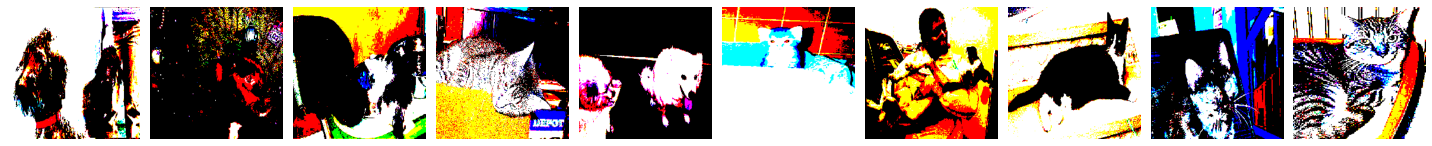

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [75]:
plotImages(imgs)
print(labels)

In [76]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [80]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 25s - loss: 17.3753 - accuracy: 0.5560 - val_loss: 8.4786 - val_accuracy: 0.5800 - 25s/epoch - 245ms/step
Epoch 2/10
100/100 - 23s - loss: 3.4720 - accuracy: 0.7460 - val_loss: 6.2786 - val_accuracy: 0.5650 - 23s/epoch - 234ms/step
Epoch 3/10
100/100 - 24s - loss: 1.0298 - accuracy: 0.8730 - val_loss: 5.3573 - val_accuracy: 0.6200 - 24s/epoch - 238ms/step
Epoch 4/10
100/100 - 23s - loss: 0.4380 - accuracy: 0.9220 - val_loss: 4.1057 - val_accuracy: 0.6000 - 23s/epoch - 234ms/step
Epoch 5/10
100/100 - 24s - loss: 0.1202 - accuracy: 0.9670 - val_loss: 3.3702 - val_accuracy: 0.6550 - 24s/epoch - 237ms/step
Epoch 6/10
100/100 - 24s - loss: 0.0082 - accuracy: 0.9960 - val_loss: 3.0367 - val_accuracy: 0.6500 - 24s/epoch - 240ms/step
Epoch 7/10
100/100 - 23s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.1199 - val_accuracy: 0.6550 - 23s/epoch - 235ms/step
Epoch 8/10
100/100 - 24s - loss: 5.5317e-04 - accuracy: 1.0000 - val_loss: 3.1163 - val_accuracy: 0.6500 - 24s/epoch 

In [82]:
#vgg16 model

vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 699s 1us/step


In [83]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [84]:
type(vgg16_model)

keras.engine.functional.Functional

In [85]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [86]:
for layer in model.layers:
    layer.trainable = False

In [87]:
model.add(Dense(units=2, activation='softmax'))

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [90]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 84s - loss: 0.3734 - accuracy: 0.8370 - val_loss: 0.1241 - val_accuracy: 0.9600 - 84s/epoch - 840ms/step
Epoch 2/5
100/100 - 84s - loss: 0.0904 - accuracy: 0.9650 - val_loss: 0.0993 - val_accuracy: 0.9700 - 84s/epoch - 845ms/step
Epoch 3/5
100/100 - 83s - loss: 0.0601 - accuracy: 0.9760 - val_loss: 0.0915 - val_accuracy: 0.9700 - 83s/epoch - 834ms/step
Epoch 4/5
100/100 - 83s - loss: 0.0433 - accuracy: 0.9880 - val_loss: 0.0909 - val_accuracy: 0.9750 - 83s/epoch - 826ms/step
Epoch 5/5
100/100 - 83s - loss: 0.0318 - accuracy: 0.9920 - val_loss: 0.0897 - val_accuracy: 0.9750 - 83s/epoch - 831ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

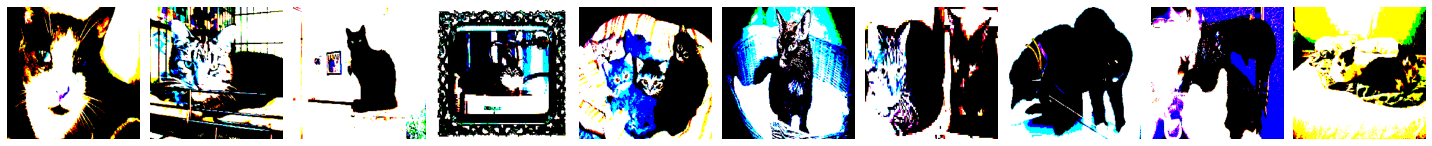

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [92]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [96]:
test_imgs, test_labels = next(test_batches)

In [97]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [141]:
predictions.shape

predictions[1]

(100, 2)

array([9.9995625e-01, 4.3768126e-05], dtype=float32)

In [99]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[49  1]
 [ 1 49]]


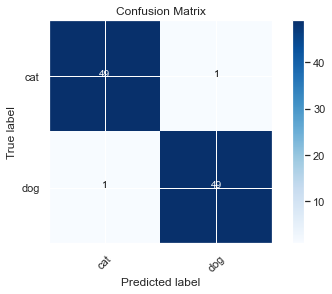

In [100]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [142]:
np.argmax(predictions, axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [147]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
os.chdir(r'C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs data Store')

In [106]:
%pwd

'C:\\Users\\Stephen\\OneDrive\\Northwestern\\422 ML\\Dogs data Store'

In [201]:
test_data_path = 'test\data'

In [205]:
os.listdir(test_data_path)

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.

In [206]:
os.listdir(r'C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs_v_Cats\valid\dog')

['dog.10226.jpg',
 'dog.1023.jpg',
 'dog.10286.jpg',
 'dog.10328.jpg',
 'dog.10448.jpg',
 'dog.10598.jpg',
 'dog.10827.jpg',
 'dog.10830.jpg',
 'dog.10836.jpg',
 'dog.1084.jpg',
 'dog.10948.jpg',
 'dog.10966.jpg',
 'dog.11005.jpg',
 'dog.11216.jpg',
 'dog.11242.jpg',
 'dog.11400.jpg',
 'dog.11521.jpg',
 'dog.11524.jpg',
 'dog.11529.jpg',
 'dog.11653.jpg',
 'dog.11656.jpg',
 'dog.11919.jpg',
 'dog.11930.jpg',
 'dog.12110.jpg',
 'dog.12229.jpg',
 'dog.12447.jpg',
 'dog.12455.jpg',
 'dog.12480.jpg',
 'dog.1532.jpg',
 'dog.155.jpg',
 'dog.1638.jpg',
 'dog.178.jpg',
 'dog.1868.jpg',
 'dog.1932.jpg',
 'dog.2107.jpg',
 'dog.2131.jpg',
 'dog.2173.jpg',
 'dog.2270.jpg',
 'dog.2330.jpg',
 'dog.2382.jpg',
 'dog.2821.jpg',
 'dog.2831.jpg',
 'dog.2853.jpg',
 'dog.2877.jpg',
 'dog.2919.jpg',
 'dog.2988.jpg',
 'dog.3181.jpg',
 'dog.3186.jpg',
 'dog.3237.jpg',
 'dog.3243.jpg',
 'dog.3437.jpg',
 'dog.344.jpg',
 'dog.3466.jpg',
 'dog.360.jpg',
 'dog.3602.jpg',
 'dog.3659.jpg',
 'dog.3810.jpg',
 'dog.384

In [112]:
#Prepare Test Data for Prediction

test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_data_path, target_size=(224,224), class_mode='categorical', batch_size=10, shuffle=False)

Found 0 images belonging to 0 classes.


In [131]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    directory=r'C:\Users\Stephen\OneDrive\Northwestern\422 ML\Dogs data Store\test', 
    target_size=(224, 224), 
    #color_mode = 'rgb',
    batch_size=1,
    class_mode=None,  
    shuffle=False)

Found 12500 images belonging to 1 classes.


In [213]:
test_generator.filenames

['data\\1.jpg',
 'data\\10.jpg',
 'data\\100.jpg',
 'data\\1000.jpg',
 'data\\10000.jpg',
 'data\\10001.jpg',
 'data\\10002.jpg',
 'data\\10003.jpg',
 'data\\10004.jpg',
 'data\\10005.jpg',
 'data\\10006.jpg',
 'data\\10007.jpg',
 'data\\10008.jpg',
 'data\\10009.jpg',
 'data\\1001.jpg',
 'data\\10010.jpg',
 'data\\10011.jpg',
 'data\\10012.jpg',
 'data\\10013.jpg',
 'data\\10014.jpg',
 'data\\10015.jpg',
 'data\\10016.jpg',
 'data\\10017.jpg',
 'data\\10018.jpg',
 'data\\10019.jpg',
 'data\\1002.jpg',
 'data\\10020.jpg',
 'data\\10021.jpg',
 'data\\10022.jpg',
 'data\\10023.jpg',
 'data\\10024.jpg',
 'data\\10025.jpg',
 'data\\10026.jpg',
 'data\\10027.jpg',
 'data\\10028.jpg',
 'data\\10029.jpg',
 'data\\1003.jpg',
 'data\\10030.jpg',
 'data\\10031.jpg',
 'data\\10032.jpg',
 'data\\10033.jpg',
 'data\\10034.jpg',
 'data\\10035.jpg',
 'data\\10036.jpg',
 'data\\10037.jpg',
 'data\\10038.jpg',
 'data\\10039.jpg',
 'data\\1004.jpg',
 'data\\10040.jpg',
 'data\\10041.jpg',
 'data\\10042.

In [214]:
test_generator.filenames[0]

'data\\1.jpg'

In [221]:
import re
regex = re.compile(r'\d+')

In [229]:
#Get Image ID associated with each file from the file name
image_id_list = []

for i in range(0,12500):
    xx = [int(x) for x in regex.findall(test_generator.filenames[i])]
    image_id_list.append(xx)

In [230]:
image_id_list

[[1],
 [10],
 [100],
 [1000],
 [10000],
 [10001],
 [10002],
 [10003],
 [10004],
 [10005],
 [10006],
 [10007],
 [10008],
 [10009],
 [1001],
 [10010],
 [10011],
 [10012],
 [10013],
 [10014],
 [10015],
 [10016],
 [10017],
 [10018],
 [10019],
 [1002],
 [10020],
 [10021],
 [10022],
 [10023],
 [10024],
 [10025],
 [10026],
 [10027],
 [10028],
 [10029],
 [1003],
 [10030],
 [10031],
 [10032],
 [10033],
 [10034],
 [10035],
 [10036],
 [10037],
 [10038],
 [10039],
 [1004],
 [10040],
 [10041],
 [10042],
 [10043],
 [10044],
 [10045],
 [10046],
 [10047],
 [10048],
 [10049],
 [1005],
 [10050],
 [10051],
 [10052],
 [10053],
 [10054],
 [10055],
 [10056],
 [10057],
 [10058],
 [10059],
 [1006],
 [10060],
 [10061],
 [10062],
 [10063],
 [10064],
 [10065],
 [10066],
 [10067],
 [10068],
 [10069],
 [1007],
 [10070],
 [10071],
 [10072],
 [10073],
 [10074],
 [10075],
 [10076],
 [10077],
 [10078],
 [10079],
 [1008],
 [10080],
 [10081],
 [10082],
 [10083],
 [10084],
 [10085],
 [10086],
 [10087],
 [10088],
 [10089]

In [173]:
test_images = test_generator

In [132]:
test_predictions = model.predict(x=test_generator, steps=12500, verbose=0)

In [133]:
test_predictions.shape

(12500, 2)

In [188]:
test_predictions[0]

array([0.00158545, 0.9984145 ], dtype=float32)

In [164]:
pred1=np.argmax(test_predictions, axis=-1)

In [167]:
pred1[0:20]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [236]:


submit = pd.DataFrame()

submit['id'] = image_id_list
submit['id'] = submit['id'].str.get(0)
submit['label'] = pred1  #invert prediction

#sort by id
submit = submit.sort_values(by=['id'], ascending=True)

submit.to_csv('submission1.csv',index=False)

submit.head()

submit.shape

,id,label
0,1,1
3612,2,1
4723,3,1
5834,4,1
6945,5,0


(12500, 2)

In [238]:
submit.head(20)

,id,label
0,1,1
3612,2,1
4723,3,1
5834,4,1
6945,5,0
8056,6,0
9167,7,0
10278,8,0
11389,9,0
1,10,0


Visually checking my first 20 predictions with the first 20 test pictures, all predictions appear correct, but my submission returned a log loss of .83446, which is in the bottom 25% of the kaggle leaderboard.

In [241]:
#Lets see if submitting the probabilty of dog performs better
pred2 = test_predictions[:, [1]]

In [243]:
submit = pd.DataFrame()

submit['id'] = image_id_list
submit['id'] = submit['id'].str.get(0)
submit['label'] = pred2  #invert prediction

#sort by id
submit = submit.sort_values(by=['id'], ascending=True)

submit.to_csv('submission2.csv',index=False)

submit.head()

submit.shape

,id,label
0,1,0.998415
3612,2,0.996662
4723,3,0.999889
5834,4,0.999496
6945,5,0.000005


(12500, 2)

This returned a log loss score of .08366, much better - now in the top 25% of the leaderboard.